<a href="https://colab.research.google.com/github/BlackCurrantDS/ATiML-Project/blob/master/Genre_EDA_Part1_ScatterPlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Notebook explores the genre distribution part of EDA

In [0]:
############################################################################
################## Importing Required Pacakges##############################
############################################################################

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import re
import os


""" This block is for EDA on the given data"""

####################Importing csv file with names and authors################

#Assuming File location is local "Need to change it"

#Getting data into dataframe

%time
data = pd.read_csv("books_base_line.csv", index_col=0)
data.head(5)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.3 µs


,FileNo,data,genre,Author_Name,Book_Name
0,17390,E-text prepared by Al Haines\nIt all depends u...,Literary,MacGrath| Harold,Hearts and Masks
1,15989,Arch Trevlyn had had a good day. Business had ...,Literary,Augusta| Clara,The Fatal Glove
2,36353,"This work was the forerunner and, according to...",Literary,Paul| Jean,The Invisible Lodge
3,41963,"""EASTOVER COURT HOUSE."" By Henry Burnham Boone...",Literary,Colton| Arthur,The Debatable Land: A Novel
4,426,Decorative graphic\nJohn Varey Nicholson was s...,Literary,Stevenson| Robert Louis,Tales and Fantasies


In [0]:
#Checking memory usage in detail with distribution of data
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 995
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FileNo       996 non-null    int64 
 1   data         994 non-null    object
 2   genre        996 non-null    object
 3   Author_Name  996 non-null    object
 4   Book_Name    996 non-null    object
dtypes: int64(1), object(4)
memory usage: 548.4 MB


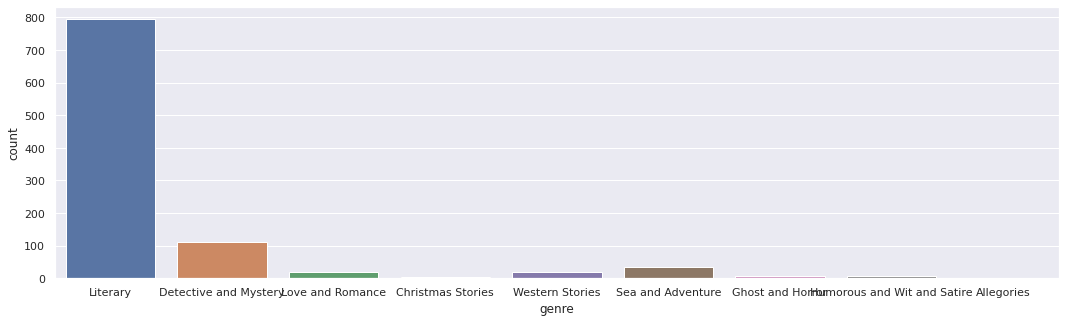

'Clearly Classes are imbalanced, Literarcy genre has higest values and Allegories almost have no books'

In [0]:
##################################### Genre count Plot ######################################

plt.figure(figsize=(18,5))

#See how much the Gernes are distributed
sns.countplot(data['genre'])
plt.show()

"""Clearly Classes are imbalanced, Literarcy genre has higest values and Allegories almost have no books"""

In [0]:
#chekcing the actualy counts of each gerne

data.genre.value_counts()


"""
Literary                       794
Detective and Mystery          111
Sea and Adventure               36
Love and Romance                18
Western Stories                 18
Humorous and Wit and Satire      6
Ghost and Horror                 6
Christmas Stories                5
Allegories                       2

"""

'\nLiterary                       794\nDetective and Mystery          111\nSea and Adventure               36\nLove and Romance                18\nWestern Stories                 18\nHumorous and Wit and Satire      6\nGhost and Horror                 6\nChristmas Stories                5\nAllegories                       2\n\n'

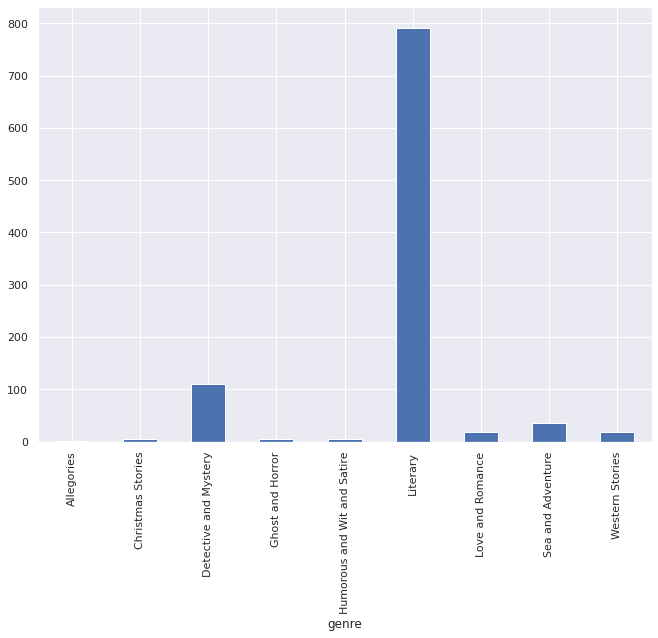

<Figure size 792x576 with 0 Axes>

In [0]:
# A little better visulatisation
data.groupby('genre')['data'].count().plot(kind = 'bar')
plt.show()
plt.clf()

Distribution of number of books by auhtors in each genre

In [0]:
classes = ['Literary']
subset_literary  =data.loc[data['genre'].isin(classes)]

# Literary

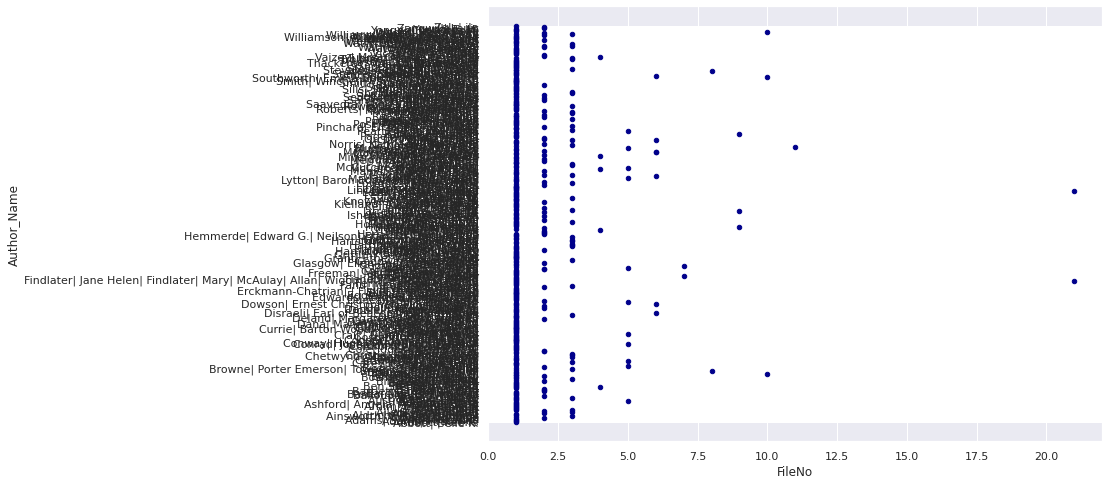

In [0]:
#df for number of books per author
df1 = subset_literary.groupby('Author_Name')['FileNo'].count().reset_index()
df1.groupby('FileNo')['Author_Name'].count().reset_index()
ax1 = df1.plot.scatter(x='FileNo',y='Author_Name',c='DarkBlue')

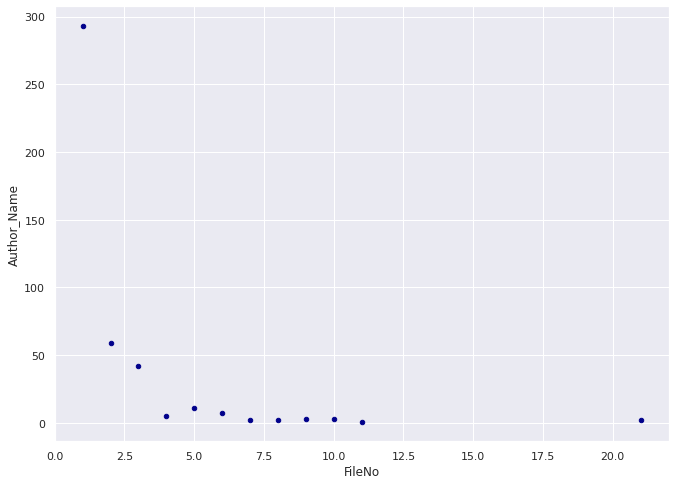

In [0]:
df2 = df1.groupby('FileNo')['Author_Name'].count().reset_index()
ax1 = df2.plot.scatter(x='FileNo',y='Author_Name',c='DarkBlue')

# Detective and Mystery

In [0]:
classes = ['Detective and Mystery']
subset_literary  =data.loc[data['genre'].isin(classes)]

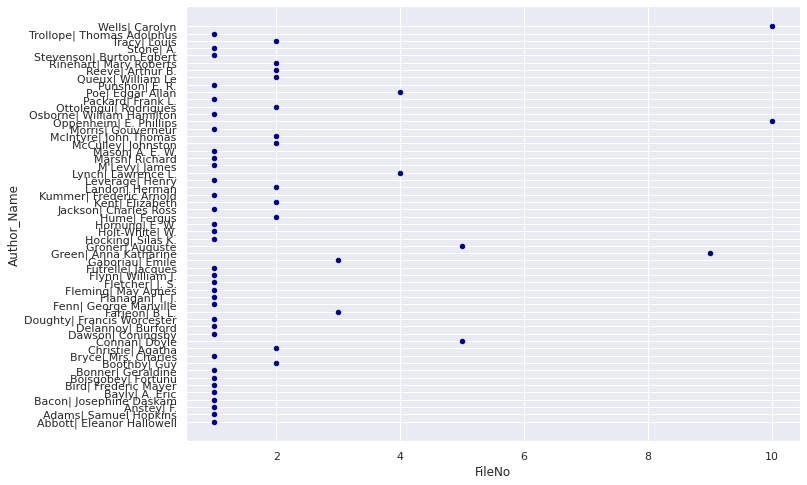

In [0]:
#df for number of books per author
df1 = subset_literary.groupby('Author_Name')['FileNo'].count().reset_index()
df1.groupby('FileNo')['Author_Name'].count().reset_index()
ax1 = df1.plot.scatter(x='FileNo',y='Author_Name',c='DarkBlue')

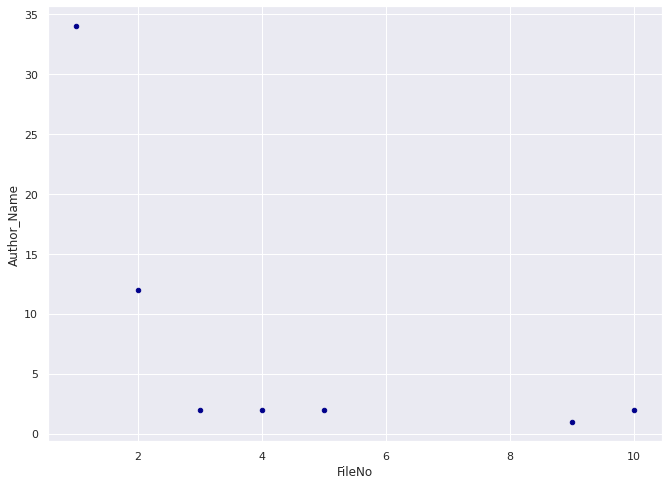

In [0]:
df2 = df1.groupby('FileNo')['Author_Name'].count().reset_index()
ax1 = df2.plot.scatter(x='FileNo',y='Author_Name',c='DarkBlue')

# All Genres together

In [0]:
#df for number of books per author
df1 = data.groupby(['genre', 'Author_Name'])['FileNo'].count().reset_index()

In [0]:
df2 = df1.groupby(['genre','FileNo'])['Author_Name'].count().reset_index()

[Text(0, 0.5, 'Number of Authors'), Text(0.5, 0, 'Number of Books')]

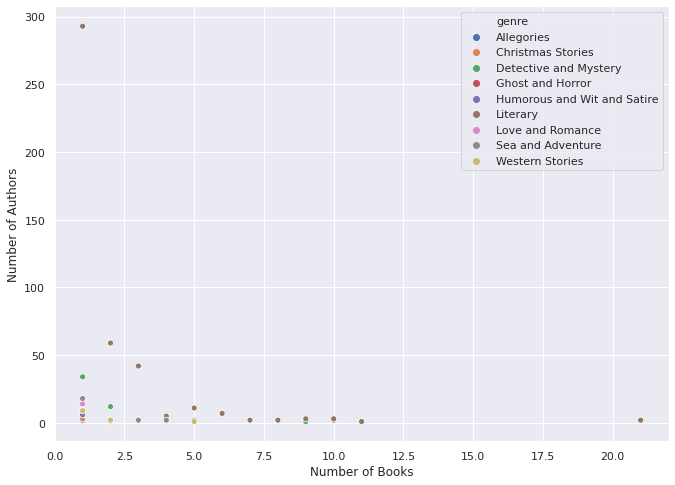

In [0]:
sns.set(rc={'figure.figsize':(11,8)})
ax = sns.scatterplot(data=df2, x='FileNo', y='Author_Name', hue='genre')
ax.set(xlabel='Number of Books', ylabel='Number of Authors')

If Same author has written books across genres in dataset

In [0]:
new_data = data.groupby('Author_Name')['genre'].count().reset_index()

In [0]:
s = data.groupby('Author_Name').genre.nunique().sort_values(ascending=False).reset_index()
s = s.loc[s['genre'] >1]
len(s)

#there are total 45 autors who has written books in more than 1 genre, out of them only 3 has written in 3 different genres.

45

In [0]:
data.loc[data['Author_Name'] == 'Farjeon| B. L.']

,FileNo,data,genre,Author_Name,Book_Name
79,39111,"In Dropmore Beeches, near Beddington, county o...",Literary,Farjeon| B. L.,Miser Farebrother: A Novel (vol. 1 of 3)
208,42906,"In the hope of her husband's return, and looki...",Detective and Mystery,Farjeon| B. L.,Great Porter Square: A Mystery. v. 2
376,42905,"Mrs. James Preedy, lodging-house keeper, bred ...",Detective and Mystery,Farjeon| B. L.,Great Porter Square: A Mystery. v. 1
471,43190,page 01b In the heart of a very maze of courts...,Christmas Stories,Farjeon| B. L.,Blade-O'-Grass. Golden Grain. and Bread and Ch...
543,42907,"My Dearest Love - How, did you like my little ...",Detective and Mystery,Farjeon| B. L.,Great Porter Square: A Mystery. v. 3
